In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
df_train = pd.read_csv("drugsComTrain_raw.csv")
df_test = pd.read_csv("drugsComTest_raw.csv")
df_train['sentiment'] = df_train['rating'].apply(lambda x: 1 if x>5 else 0)
df_test['sentiment'] = df_test['rating'].apply(lambda x: 1 if x>5 else 0)

In [5]:
X_train = df_train['review']
X_test = df_test['review']
y_train = df_train['sentiment']
y_test = df_test['sentiment']

In [26]:
cv_uni = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_uni = cv_uni.fit_transform(X_train)
X_test_uni = cv_uni.transform(X_test)

In [12]:
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english',ngram_range=(2, 2))
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [14]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
train_predictions = naive_bayes.predict(X_train_cv)
test_predictions = naive_bayes.predict(X_test_cv)

In [17]:
from sklearn import metrics
from sklearn.metrics import classification_report
training_score = metrics.classification_report(y_train,train_predictions)
testing_score = metrics.classification_report(y_test,test_predictions)
print("***************** TRAINING SCORE ********************\n")
print(training_score)
print("\n***************** TESTING SCORE *********************\n")
print(testing_score)

***************** TRAINING SCORE ********************

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     48088
           1       0.98      0.99      0.99    113209

    accuracy                           0.98    161297
   macro avg       0.98      0.97      0.98    161297
weighted avg       0.98      0.98      0.98    161297


***************** TESTING SCORE *********************

              precision    recall  f1-score   support

           0       0.91      0.76      0.82     16207
           1       0.90      0.97      0.93     37559

    accuracy                           0.90     53766
   macro avg       0.90      0.86      0.88     53766
weighted avg       0.90      0.90      0.90     53766



AUC: 0.86


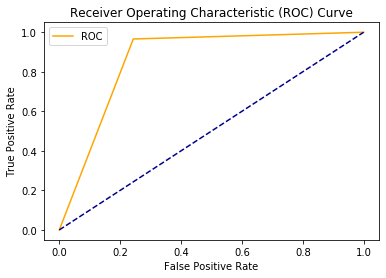

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
auc = roc_auc_score(y_test, test_predictions)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig("naivebayes_roc_bigrams.jpg")
plt.show()

#plot_roc_curve(fpr, tpr)

In [28]:
naive_bayes.fit(X_train_uni, y_train)
train_predictions_uni = naive_bayes.predict(X_train_uni)
test_predictions_uni = naive_bayes.predict(X_test_uni)
training_score_uni = metrics.classification_report(y_train,train_predictions_uni)
testing_score_uni = metrics.classification_report(y_test,test_predictions_uni)
print("***************** TRAINING SCORE (UNI-GRAMS)********************\n")
print(training_score_uni)
print("\n***************** TESTING SCORE(UNI-GRAMS) *********************\n")
print(testing_score_uni)

***************** TRAINING SCORE (UNI-GRAMS)********************

              precision    recall  f1-score   support

           0       0.68      0.72      0.70     48088
           1       0.88      0.86      0.87    113209

    accuracy                           0.82    161297
   macro avg       0.78      0.79      0.78    161297
weighted avg       0.82      0.82      0.82    161297


***************** TESTING SCORE(UNI-GRAMS) *********************

              precision    recall  f1-score   support

           0       0.66      0.68      0.67     16207
           1       0.86      0.85      0.86     37559

    accuracy                           0.80     53766
   macro avg       0.76      0.77      0.76     53766
weighted avg       0.80      0.80      0.80     53766



AUC: 0.77


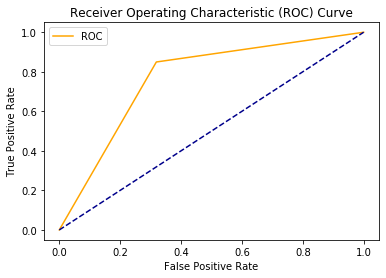

In [42]:
auc_uni = roc_auc_score(y_test, test_predictions_uni)
print('AUC: %.2f' % auc_uni)

fpr_uni, tpr_uni, thresholds_uni = roc_curve(y_test, test_predictions_uni)
plt.plot(fpr_uni, tpr_uni, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig("naivebayes_roc_unigrams.jpg")
plt.show()

#plot_roc_curve(fpr_uni, tpr_uni)